# Image Processing Notebook
This notebook will contain image processing techniques documented in the book **Image Processing and Aquisition using Python** by **Ravishankar Chityala**

### Imports

In [1]:
import numpy as np
from scipy import ndimage, misc
from skimage import feature
from scipy.misc.pilutil import Image
import scipy.fftpack as fftim
import scipy.misc
from skimage import filters
import matplotlib.pyplot as plt
import cv2
import png
from IPython.display import display, Math

# Chapter 4 Spatial Filters

## Mean Filter
An example of a linear filter is the mean filter. A funciton is linear if it obeys the property, where $f$ is some function
$$
f(x+y) = f(x) + f(y)
$$

### Uses of Mean Filter:
 * Removes noise
 * Enhances quality of image by brightening it
 
### Disadvantages
 * Edges get blurred

In [546]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [547]:
# Initialize the filter as a n x n array; normalize array by number of elements
n = 3
k = np.ones((n, n))/(n*n)

In [548]:
# Perform convolution
meanfiltered_array = scipy.ndimage.filters.convolve(image, k)

In [549]:
# Convert b from an array to an image
meanfiltered = Image.fromarray(meanfiltered_array)

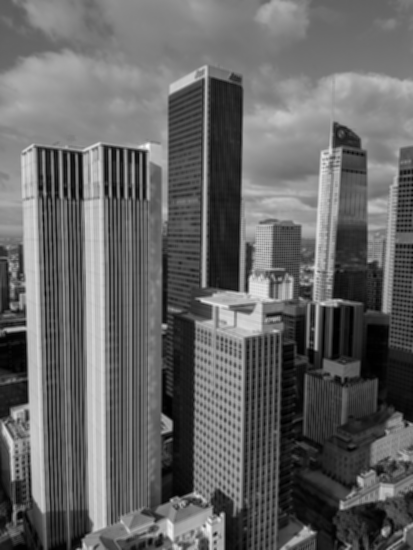

In [550]:
# Save the image
meanfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MeanFilter.png")
meanfiltered

## Median Filter
Functions that do not obey
$$
f(x+y) = f(x) + f(y)
$$
are non-linear. A sliding window is chosen and places on top of the image at position $(i, j)$. All the values under this sliding window are collected and their median is calculated and placed at position $(i, j)$.

### Uses of Median Filter
   * Used to remove salt and pepper noise
   * Removes impulse noise

In [551]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [552]:
# Perform median filter
medianfiltered_array = scipy.ndimage.filters.median_filter(image, size = 3,
                                                   footprint = None,
                                                   output = None,
                                                   mode = 'reflect',
                                                   cval = 0.0, origin = 0)

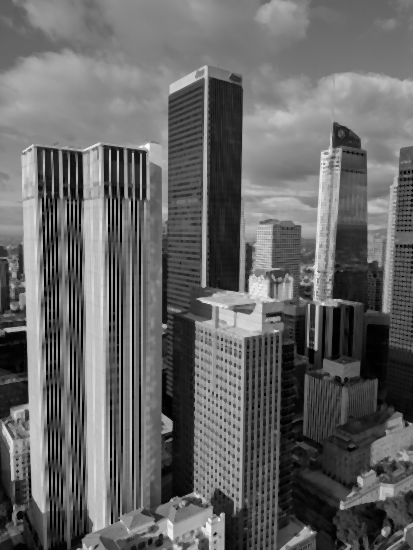

In [553]:
# Convert from array to image
medianfiltered= Image.fromarray(medianfiltered_array)
# Save the image
medianfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MedianFilter.png")
medianfiltered

## Max Filter
The max filter enhances bright points in an image. The maximum values in a sub-image at $(i, j)$

It can be seen in the output image that the buildings have been brightened.

### Uses of Max filter
   * Enhances bright points in an image 

In [554]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [555]:
# Perform the max filter
maxfiltered_array = scipy.ndimage.filters.maximum_filter(image, size = 3,
                                                   footprint = None,
                                                   output = None,
                                                   mode = 'reflect',
                                                   cval = 0.0, origin = 0)

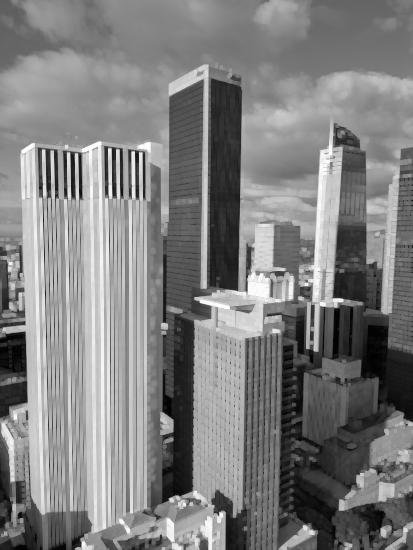

In [556]:
# Convert from array to image
maxfiltered = Image.fromarray(maxfiltered_array)
# Save the image
maxfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MaxFilter.png")
maxfiltered

## Min Filter
The min filter enhances dark points in an image. The minimum value of the sub-image replaces the value at $(i, j)$.


### Uses of Min filter
   * Enhances dark points in an image 

In [557]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [558]:
# Perform the min filter
minfiltered_array = scipy.ndimage.filters.minimum_filter(image, size = 3,
                                                   footprint = None,
                                                   output = None,
                                                   mode = 'reflect',
                                                   cval = 0.0, origin = 0)

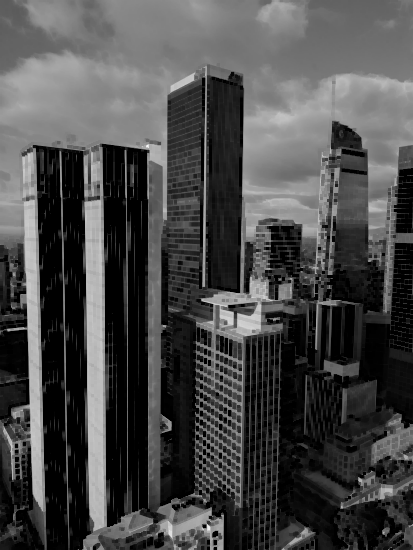

In [559]:
# Convert from array to image
minfiltered = Image.fromarray(minfiltered_array)
# Save the image
minfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MinFilter.png")
minfiltered

## First Derivative Filters
An image is not a continuous function, rather each pixel is a discrete value. To bein talking about derivatives, we will look at the continuous case and extend it to discrete cases. The gradiaent of a coninuous function is given by
$$
\nabla f = \begin{bmatrix}
               f_x \\
               f_y
            \end{bmatrix}
$$
where $f_x = \frac{\partial f}{\partial x}$ which is the change of funciton $f$ with respect to variable $x$-in the horizantal position. The same is with $y$ for the verical direction.

The magnitude of the gradient, or size of the rate of chagne, is a scalar quantity and is given by
$$
\lvert \nabla f \rvert = [ (f_x)^2 + (f_y)^2 ]^{(\frac{1}{2})}
$$

which we can write as 
$$
\lvert \nabla f \rvert = \lvert f_x \rvert + \lvert f_y \rvert
$$
$$
\theta = \arctan \left( \frac{f_y}{f_x} \right)
$$

### Sobel Mask
A popular first derivative filter to find horizantal and vertical edges are given in by for horizantal edges

$$
\begin{bmatrix}
     -1 & -2 & -1 \\
     0 & 0 & 0 \\
     1 & 2 & 1 \\
\end{bmatrix}
$$

and for veritcal edges

$$
\begin{bmatrix}
     -1 & 0 & 1 \\
     -2 & 0 & 2 \\
     -1 & 0 & 1 \\
\end{bmatrix}
$$

#### Important Properties of Sobel Filter
   * Sum of coefficients in the mask is 0. The result of this is that pixels with constant greysacle are not affected by the derivative filter
   * Noise is created
   
### Prewitt Mask

#### Important Properties of Sobel Filter
   * Sum of coefficients in the mask is 0.
   * Filter does not reduce noise

## Sobel Filter

In [164]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """


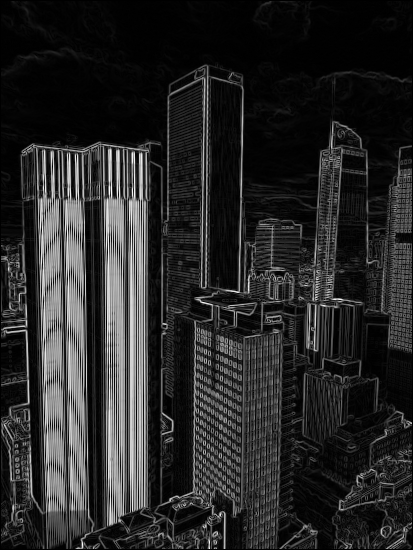

In [165]:
# Performing the Sobel Filter
sobelfiltered_array = filters.sobel(image)

# Convert array to image
sobelfiltered = scipy.misc.toimage(sobelfiltered_array)
sobelfiltered.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C4SobelFilter.png')
sobelfiltered

## Prewitt Filter

In [166]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


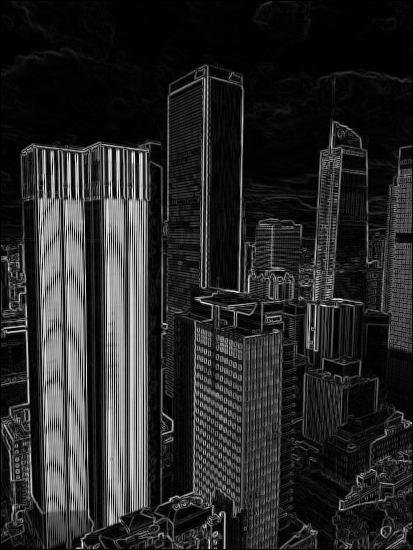

In [167]:
# Performing the Prewitt Filter
# prewittfiltered_array = ndimage.prewitt(image)
prewittfiltered_array = filters.prewitt(image)
# Convert array to image
# prewittfiltered = Image.fromarray(prewittfiltered_array)
prewittfiltered = scipy.misc.toimage(prewittfiltered_array)
prewittfiltered.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C4PrewittFilter.png')
prewittfiltered

## Canny Filter
The Canny filter is an other popular filter for edge detection. This filter takes in $\sigma$, the standard devision of the Gaussian distribution, and threashold values, $t_1$ and $t_2$. A Gaussian filter used used to smooth the image.

A property of a pixel located on an edge is that it's gradient magnitude is at a maximum in the direction of the graduent. The magnitude of the gradiaent is given by

$$
\lvert \nabla f \rvert = \lvert f_x \rvert + \lvert f_y \rvert
$$
the corresponding diection of is given by 
$$
\theta = \arctan \left( \frac{f_y}{f_x} \right)
$$
at the edge points, the first derivative will have a minimum or maximum. What this entails is that the magnitude of the gradient of the image at the edges is a maximum. These pixels will be known as ridge pixels. The ridge tops will be retained and all other pixels will be assigned a value of zero to identity edge points and suppress all others. This process is known as non-maximal suppression.

The threasholds defined earlier, $t_1$ and $t_2$, are the low and high threashold. These are often known as ridge threasholds. The pixel values of the ridge pizels help classify edge pixels are 'weak' or 'strong'. Pixels whose values are higher than the high threashold will be classifed as edge pixels, whereas the redige pizels between the low and high threashold are known as weak edge points. The final se of the algorithm takes the weak edge pixels are 8-connected with strong edge pixels.

In [168]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [318]:
# Convert the image to an array
image_array = np.asarray(image)
# Perform Canny Image Filter
cannyfiltered_array = feature.canny(image_array, sigma = 1.0)
# Conver to image and save
cannyfiltered = png.from_array(cannyfiltered_array, 'L')
cannyfiltered.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C4CannyFilter.png')

## Second Derivative Filters
### Laplacian
In this filter, the second erivative is computed in order to locate edges. The Laplacian is a popular method to determne edges. The Laplacian of a continuous function is defined as
$$
\nabla^2 f = \frac{\partial^2f}{\partial x^2} + \frac{\partial^2f}{\partial y^2}
$$

The discrete Laplacian in the discrete case has several forms. The most wildy used forms are
$$
\begin{bmatrix}
     0 & 1 & 0 \\
     -1 & 4 & -1 \\
     0 & -1 & 0 \\
\end{bmatrix}
$$

$$
\begin{bmatrix}
     -1 & -1 & -1 \\
     -1 & 8 & 1 \\
     -1 & -1 & -1 \\
\end{bmatrix}
$$

### Properties of Laplacian
   * Adds noise to the image 

In [183]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

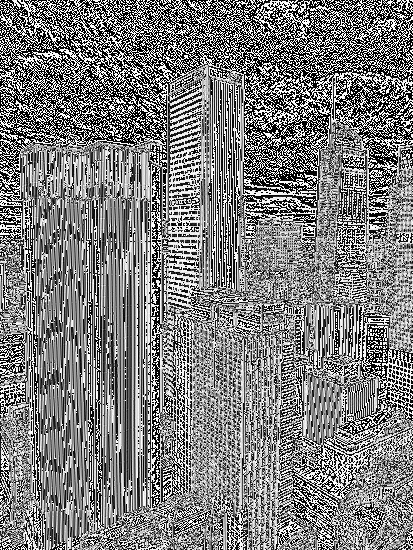

In [184]:
# Perform the Laplacian fiter; mode determines how padding the borders will take place
laplacianarray = scipy.ndimage.filters.laplace(image, mode = 'reflect')
# Convert from array to image
laplacian = Image.fromarray(laplacianarray)
laplacian.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C4LaplacianFilter.png')
laplacian

## Gaussian Offset to the Laplacian
To offset the noise in the Laplacian, a smoothing function is used along with the Laplacian. The Gaussian smooths the noise induced by the second derivative. THe Gaussian filter is given by
    $$
    G(r) = -e^{\frac{-r^2}{2 \sigma^2}}
    $$
Where $r$ is $r^2 = x^2 + y^2$ and $\sigma$ is the standard deviation. The convolution of an image with the Gaussian will result in a smoothed image. The standard deviation, or width of the Gaussian, will determine the magnitude of the smoothing.

The convolution of the Laplacian with the Gaussian is known as the Laplacian of Gaussian which will be denoted by LoG. Because the Laplacian is an operator that operates on the Gaussian, we can determine LoG with respect to $r$ by
$$
\nabla^2 G(r) = - \left( \frac{r^2 - \sigma^2}{\sigma^4} e^{\frac{-r^2}{2 \sigma^2}} \right)
$$

The LoG mask or filter of size 5-by-5 is given by
$$
\begin{bmatrix}
     0 & 0 & -1 & 0 & 0 \\
     0 & -1 & -2 & -1 & 0 \\
     -1 & -2 & 16 & -2 & -1 \\
     0 & -1 & -2 & -1 & 0 \\
     0 & 0 & -1 & 0 & 0 \\
\end{bmatrix}
$$

The LoG is able to determine the edges in the images much more accurately than the Laplacian. However, the non-uniform nature of the background contrubutes to the formation of blobs-groups of conencted pixels.

### Disadvantage of LoG
   * Computational price as two operations
       * Gaussian followed by Laplacian
   * Oversegments the edges within the obected cauing closed loops (spaghetti effect)

In [185]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

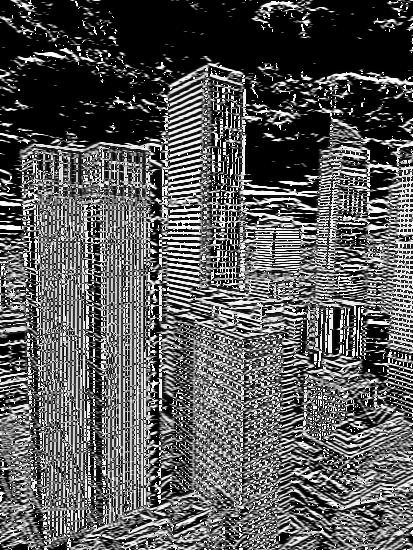

In [201]:
# perform the LoG
LoGarray = scipy.ndimage.filters.gaussian_laplace(image, sigma = 1, mode = 'reflect')
# Convert from array to image
LoG = Image.fromarray(LoGarray)
LoG.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C4LaplacianofGausianFilter.png')
LoG

# Chapter 5 Image Enhancement
This chapter will cover image enhancement techniques. These techniques will transform the pixel values in the input images to a new value using a mapping function.

## Simple Transformation

In [313]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [314]:
def transformation(array_value):
    transformedvalue = array_value/2
    try:
        return transformedvalue
    except:
        return 0
image = np.array([transformation(i) for i in image])

image = image.reshape((image.shape[0], image.shape[1])).astype(np.uint8)
image

transformed = png.fromarray(image, 'L')
transformed.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C5Transformation.png')

## Image Inverse
The inverse of an image is an linear transform. The goal is to transform dark pixels to light pixels and vice versa. If the range of intensities of the original image is $[0, L-1]$, then the inverse transformation at point $(i, j)$ is given by
$$
t(i, j) = L-1-I(i, j)
$$
We can interpret thas as, the maximum value of the image $L-1$ minus the pixel value at position $(i, j)$.

In [329]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [330]:
# Convert the image to an array
image_array = np.asarray(image)
# Perform the inversion
inversed_array = np.max(image_array) - image_array

In [331]:
# Convert the array to an image
inversed = Image.fromarray(inversed_array)

In [333]:
# Save to an image
inversed.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C5Inverse.png')

## Power Law Transformation
The power law transformation is also known as the gamma-correction, is used to enhance the quality of an image. The power transformation at $(i, j)$ is given by
$$
t(i, j) = k I(i, j)^\gamma
$$
where $k$ and $\gamma$ are positive constants and $I$ is the intensity value of the pixel in the input image at position $(i, j)$. In most cakses $k=1$.

### Cases
#### $\gamma = 1$
   * In this case the mapping is linear and the output image is the same as the input image
   
#### $\gamma < 1$

   * A narrow range of low intensity pixel values in the input image gets mapped to a wide range of high intensity pixes. While a wide range of high intensity pixel values in the input image get mapped to narrow range in the output image
   
#### $\gamma > 1$
   * A narrow range of high intensity pixel values in the input image gets mapped to a wide range of low intensity pixes. While a wide range of low intensity pixel values in the input image get mapped to narrow range of high in the output image
   
### Facts
The human brain uses gamma-correction to process an image. Naturally, gamma-corection is a built-in feature in devices that display and aquire images.

We can see from the plot below how the transformation mapps low intensity values for $\gamma < 1$. Half the pixels lie below .71, while at $\gamma > 1$ half the pixels values lie at a narrower range, below .25.

Half the pixels at gamma = 1/2  lie below intensities: 0.71
Half the pixels at gamma = 2 lie below intensities:  0.25


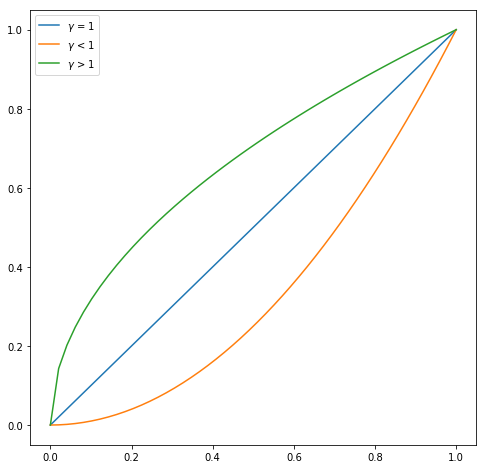

In [395]:
# Power Law Visualization
x = np.linspace(0, 1, 50)

def getPowerLawTransform(value, gamma, k = 1):
    return k*value**gamma

plt.figure(figsize = (8, 8))
plt.plot(x, [getPowerLawTransform(i, 1) for i in x], label = '$\gamma$ = 1')
plt.plot(x, [getPowerLawTransform(i, 2) for i in x], label = '$\gamma$ < 1')
plt.plot(x, [getPowerLawTransform(i, 1/2) for i in x], label = '$\gamma$ > 1')
plt.legend()

print ('Half the pixels at gamma = 1/2  lie below intensities:', round(np.percentile([getPowerLawTransform(i, 1/2) for i in x], 50), 2))
print ('Half the pixels at gamma = 2 lie below intensities: ', round(np.percentile([getPowerLawTransform(i, 2) for i in x], 50), 2))

For an 8-bit image, the range of values of the pixel values is bounded by $[0, 2^8-1] = [0, 255]$. If the transformation is applied according to

$$
t(i, j) = k I(i, j)^\gamma
$$

and for $\gamma > 1$, the output pixels will not be out of the range and this will result in an over exposed image. To avoid this, the pixel values must be normailzed according to

$$
\frac{I(i, j)}{max(I)}
$$

When $k=1$m, normalizing the pixel intensity according to the equation above, and applying the natual log of the equation this yeils

$$
\ln(t(i, j)) = \ln(I_{norm})^\gamma
$$

Exponentiating both sizes will then yeild
$$
e^{\ln(t(i, j))} = e^{\ln(I_{norm})^\gamma}
$$

The equation above will simplify to
$$
t(i, j) =  e^{\gamma * \ln(I_{norm})}
$$
To 'un-normalize' the image and return the values to have a range $[0, 255]$ we can multiply the equation above by 255, the normalization factor we had before-the $max(I)$.

In [668]:
# Open an image an convert to greyscale and convert to an array
image = np.asarray(Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


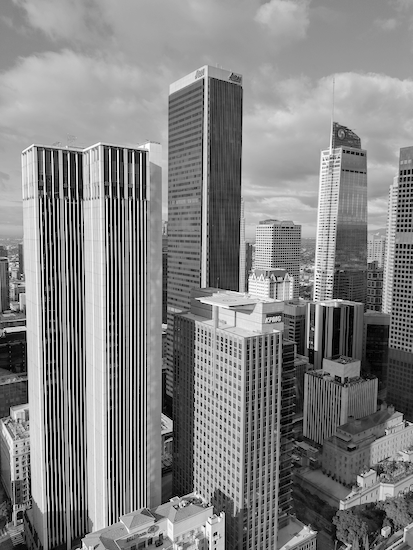

In [669]:
# Set gamma
gamma = .65
# Convert image to floats
image = image.astype(float)

# Normalize the image
image_n = image / np.max(image)

# Apply the gamma transformation
image_gamma_array = np.exp(np.log(image_n)*gamma)*np.max(image)

# Set the array as integers
image_gamma_array = image_gamma_array.astype(np.uint8)

# Convert array to image
image_gamma = Image.fromarray(image_gamma_array)
image_gamma.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C5Gamma.png')
image_gamma

In [726]:
def FindOptimalGamma(image, lower, upper, steps = 100):
    Gammas = list()
    image_n = image/np.max(image)
    for i, j in enumerate(np.linspace(lower, upper, steps)):
        image_gamma_array = np.exp(np.log(image_n)*j)*np.max(image)
        Gammas.append(tuple((j, np.std(image_gamma_array))))

    GammasArray = np.array(Gammas)
    GammasArray[np.isnan(GammasArray)] = 0


    return (GammasArray[:,0][np.argmax(GammasArray[:,1])])

# Open an image an convert to greyscale and convert to an array
image = np.asarray(Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L'))
FindOptimalGamma(image, -5, 5, 100)
# Nums = list()
# for i in np.linspace(10,1000, 50):
#     Num = FindOptimalGamma(image, -5, 5, i)
#     Nums.append(tuple((i, Num)))
# Nums = np.array(Nums)
# plt.plot(Nums[:,0], Nums[:,1])



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


0.6565656565656566

# Testing on a colored image

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


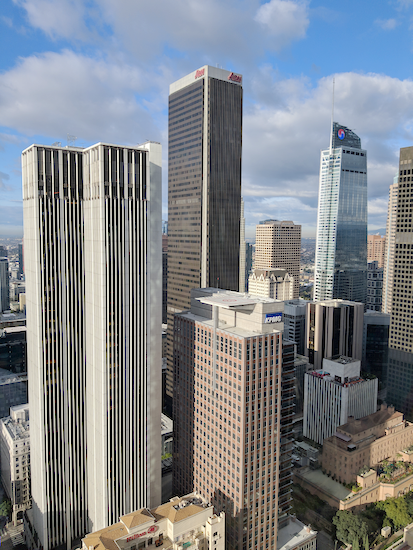

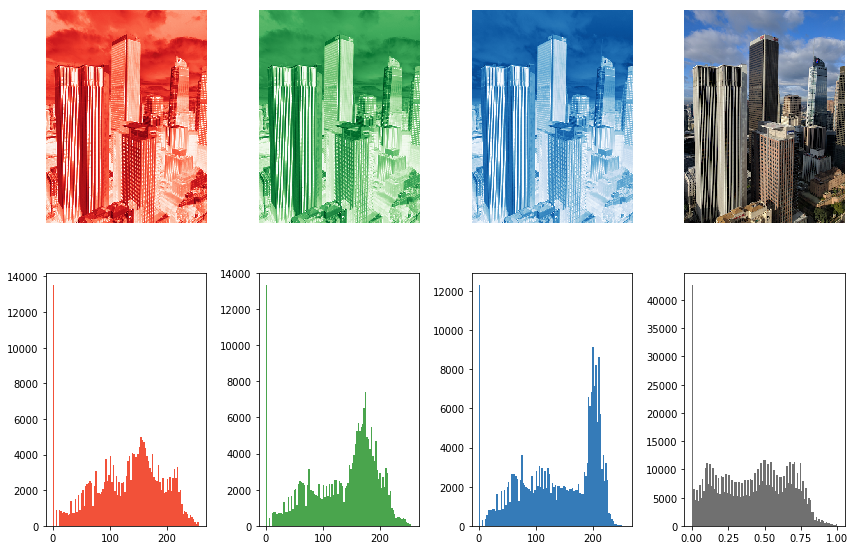

In [672]:
image = np.asarray(Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png'))

image_n = image/np.max(image)

gamma = .65
# Apply the gamma transformation
image_gamma_array = np.exp(np.log(image_n)*gamma)*np.max(image)

# Separate the Channels
Reds = np.reshape(image_gamma_array[:,:,0], (image_gamma_array.shape[0], image_gamma_array.shape[1]))
Greens = np.reshape(image_gamma_array[:,:,1], (image_gamma_array.shape[0], image_gamma_array.shape[1]))
Blues = np.reshape(image_gamma_array[:,:,2], (image_gamma_array.shape[0], image_gamma_array.shape[1]))

# Max Values for each channel
Red_Max = np.max(Reds)
Greens_Max = np.max(Greens)
Blues_Max = np.max(Blues)

fig, ax = plt.subplots(2, 4, figsize = (12,8))
ax[0, 0].imshow(Reds, cmap = 'Reds')
ax[0, 0].axis('off')
ax[0, 1].imshow(Greens, cmap = 'Greens')
ax[0, 1].axis('off')
ax[0, 2].imshow(Blues, cmap = 'Blues')
ax[0, 2].axis('off')
ax[0, 3].imshow(image_n)
ax[0, 3].axis('off')

ax[1, 0].hist(Reds.flatten(), bins = 100, color = '#F25139')
ax[1, 1].hist(Greens.flatten(), bins = 100, color = '#4AA54D')
ax[1, 2].hist(Blues.flatten(), bins = 100, color = '#357BB8')
ax[1, 3].hist(image_n.flatten(), bins = 100, color = '#707070')
plt.tight_layout()

image_gamma_array = image_gamma_array.astype(np.uint8)

# Convert array to image
final = Image.fromarray(image_gamma_array, 'RGB')
final

## Logarithmic Transformation
Logarithmic or log transforms are used to enhance pixel intensities that are otherwise issed dur to a wide range of intensity values or lost at the elxpense of high intensity values. Of the intensities in the image have range $[ 0, L-1 ]$ the log transform at position $(i, j)$ is given by
$$
t(i, j) = k log(1 + I(i, j))
$$
where the constant $k$ is given by

$$
k = \frac{L-1}{\log(1 + \lvert I_{max} \rvert)}
$$
and $\lvert I_{max} \rvert$ is the maximum value at poistion $(i, j)$. If both $I(i, j)$ and $I_{max}$ are equal to $L-1$ then $t(i, j) = L-1$. When the intensity at a pixel is 0, since $\log(1)=0$ hence $t(i, j)=0$. It's important to nose that the end points of the range will get mapped to themselves, all values in between will be transformed by the log transform.

The inverse of the log transform is given by

$$
t^{-1}(x) = e^{\frac{x}{k}}-1
$$
which does the opposite, inverse, of the log transform.

Like the power law transform with $\gamma < 1$, the log transform also maps a small range of dark or low intensity pixel values are mapped to a larger range of intensities in the output image, while a wide range of bright values will get mapped to a narrow range of low intensity values.

In [737]:
# Open an image an convert to greyscale and convert to an array
image = np.asarray(Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')).astype(float)

In [738]:
# Perform the log transform
logged_array = (255. * (np.log(1+image)) / (np.log(1+np.max(image))) )

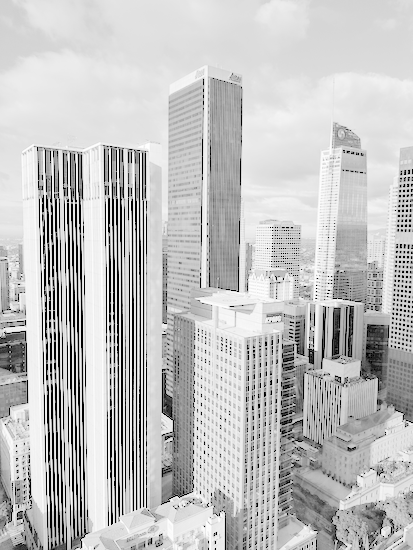

In [745]:
logged_array = logged_array.astype(np.uint8)
logged = Image.fromarray(logged_array)
logged.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C5Logged.png')
logged

## Histrogram Equalization
The histogram of an image is a discrete fucntion, and its input is the value of the pixel and the output is the numer of pixels of that value which we can denote as $h(x_n) = y_n$. In a grayscape image, the intensities will range from $[0, L-1]$. The low gray level values in the iamge correspond to bright values.

In a low contrast image, the histogram will be narrow while in a high contrast image the histogram will be wide. The goal of histgram transformation is to rescale the histogram so that the histogram of the output image will range over all possible gray values. The rescaling of the histrogram will be performed by using a transofmation. To ensure that each gray value will be maped to another gray value, we need to ensure that our transformation is one to one-for every input there is a unique output. This implies that our transformation is an increasing function.

### Prior to performing historgram equalization we must compute:
   * The histogram of the input image is normalized so that the range of the histogram is between $[0, 1]$
   * Since the image is discrete, the probabilty of a gray value will be given by $p_x(i)$. This is the ratio of the number of pixels with gray value $i$ to the total number of pixels in the image.
   * The cummulative distribution (CDF) is defined as the equation below where $0 \leq i \leq L-1$ where $L$ is the total number of grey levels in the image.
$$
\begin{equation}
C(i) = \sum_{j=0}^{i}
\end{equation}
$$
        * Note that $C(i)$ is the num of the probabilities in the grey level values from $0$ to $i$
        
The histogram equalization transformation can be defined as:
$$
h(u) = round(\frac{C(u)-C_{min}}{10 C_{min}} * (L-1))
$$
where $C_{min}$ is the minimum cumulative distribution value in the image.

In [220]:
# Open an image an convert to greyscale and convert to an array
image = np.asarray(Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L'))

In [221]:
# Flatten the image array
image_flat = image.flatten()

In [222]:
# Compute the histogram and the bins of the image
hist, bins = np.histogram(image_flat, bins = 256, range = [0, 255])

# Compute the cumulative distribution
cdf = hist.cumsum()

# Mask or ignored where cdf = 0, the rest will be stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)

In [223]:
# Perform histogram equalization
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m

In [224]:
# The masked places in cdf_m are now set to 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# cdf values are assigned in the flattened array
im2 = cdf[image_flat]

# Shape into a 3d array
histogram_equalized_array = np.reshape(im2, image.shape)

### CDF of the image
Below is the CDF of the image. The values in the cdf corresponding to pixel values will help transform the histogram of the original image.

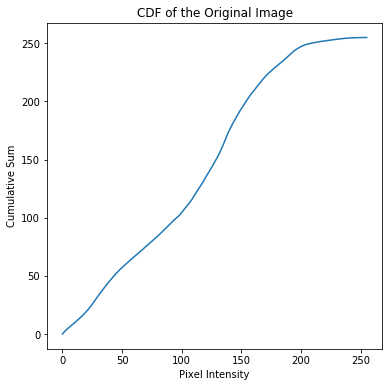

In [225]:
# Plot the cdf of the image
plt.figure(figsize = (6, 6))
plt.plot(cdf_m)
plt.title("CDF of the Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Cumulative Sum")
plt.show()

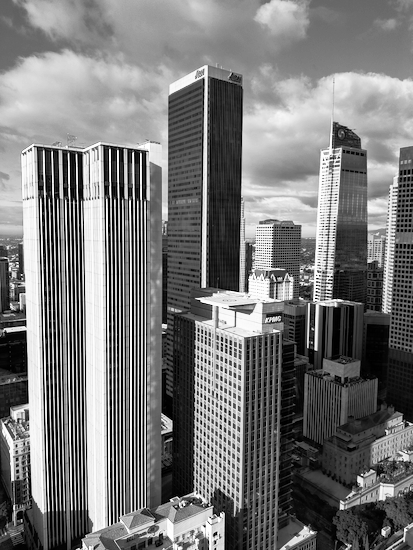

In [226]:
# Convert the reshaped array into an image
histogram_equalized = Image.fromarray(histogram_equalized_array)
histogram_equalized.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C5HistogramEqualize.png')
histogram_equalized

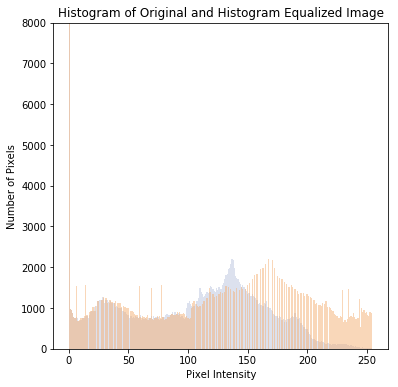

In [227]:
# Plot the histogram of the old image and the new image
plt.figure(figsize = (6, 6))
plt.hist(image_flat, bins = 256, label = 'Original', color = '#BAC4DF', alpha = .5)
plt.hist(histogram_equalized_array.flatten(), bins = 256, label = 'Equalized', color = '#F4B175', alpha = .5)
plt.title("Histogram of Original and Histogram Equalized Image")

plt.ylim([0, 8000])
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.show()

## Contrast Streching
Contrast stretching is similar to histogram equalization with the exeption that the pixel intensities are rescaled using the pixel values instead of the probabilities associated with it. Contrast stretching is used to increase the pixel value range by rescaling the pixel values in the input image.

If we consider an 8-bit iamge with a range with pixel value of [a, b] a > 0 and b < 255. If $a$ is significantly greater than zero and or if $b$ is significantly smaller than 255, then the details in the image my not be posisble.

The transformation for stretching the contrast is given by, $t(i, j)$
$$
t(i, j) = 255 * \frac{I(i, j)-a}{b-a}
$$
where $I(i, j)$, $a$, and $b$ are the pixel intensity at $(i, j)$, the minimum and maximum pixel value in the input image respectively. It is important to note that if $a = 0$ and $b = 255$ there will be no transform or change in the pixel intensities.

In [228]:
# Open an image an convert to greyscale and convert to an array
image = np.array(Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L'))

# Find the minimum and maximum pixel values
a = image.min()
b = image.max()
print (a, b)

# For deomonstration purposes, it can be seen the min and max are 0 and 255. Hence no transformation will take place.
# Remap values having less than 50, to random number between 0 - 200
image[np.where(image<50)] = int(np.random.rand(1)*200)
image[np.where(image>200)] = int(np.random.rand(1)*200)

a = image.min()
b = image.max()
print (a, b)

# # Convert the image to floats
image_floats = image.astype(float)

0 255
50 200


In [229]:
# Perform the contrast stretching transformation
contrast_transformed_array = 255 * (image_floats-a)/(b-a)

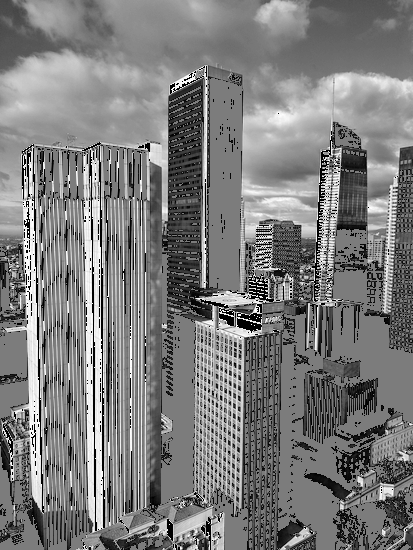

In [230]:
# Convert the reshaped array into an image
contrast_transformed = Image.fromarray(contrast_transformed_array.astype(np.uint8))
contrast_transformed.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C5ContrastTransform.png')
contrast_transformed

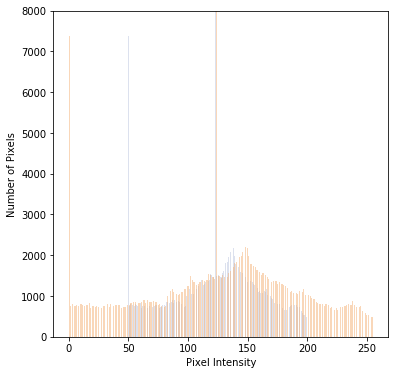

In [231]:
# Plot the histogram before and after contrast transformation
plt.figure(figsize = (6, 6))
plt.hist(image.flatten(), bins = 256, label = 'Original', color = '#BAC4DF', alpha = .5)
plt.hist(contrast_transformed_array.flatten(),  bins = 256, label = 'Equalized', color = '#F4B175', alpha = .5)

plt.ylim([0, 8000])
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.show()

# Chapter 6 Phase Space Filters

## Fourier Transform
The images previously have been taking place in the spatial domain, this chapter will discuss image analysis in the phase space.

The Fourier transform of a continuous fucntion in one variable $f(x)$  is givenn by
$$
F(u) = \int_{-\infty}^{\infty} f(x) e^{-i 2 \pi (u x)}
$$
where $i=\sqrt{-1}$. The function $f(x)$ can be calculated by the inverse Fourier transform $F(i)$ which is given by the following

$$
f(x) = \int_{-\infty}^{\infty} F(u) e^{i 2\pi (u x)}du
$$

The Fourier of a 1-D discrete fucntion, $f(x)$ for $x = 0, 1, ...L-1$ is given by
$$
F(u) = \frac{1}{L} \sum_{x=0}^{L-1} f(x) e^{\frac{-i2\pi (u x)}{L}}
$$
for $u=0, 1, 2,...L-1$

The discrete inverse Fourier Transform is
$$
f(x) = \sum_{x=0}^{L-1} F(u) e^{(\frac{i2 \pi u x}{L})}
$$
for $u=0, 1, 2,...,L-1$

Using Euler's formula $e^{i\theta}= \cos(\theta)+i\sin(\theta)$ The Fourier transform will transform to

$$
F(u) = \frac{1}{L} \sum_{x=0}^{L-1}f(x) \left[ \cos\left( \frac{-2ux\pi}{L}\right) - \sin \left( \frac{-i 2 u x \pi}{L} \right) \right]
$$

Taking into consideration the fact that cosine is an even function ($\cos(-\pi) = \cos(\pi)$), and sin is an odd function ($\sin(-\pi) = -\sin(\pi)$) the equation simplifies to
$$
F(u) = \frac{1}{L} \sum_{x=0}^{L-1}f(x) \left[ \cos\left( \frac{2ux\pi}{L}\right) + i \sin \left( \frac{2 u x \pi}{L} \right) \right]
$$

It can be seen that $F(u)$ has a real and imaginary part. The real part is the cosine term which we will call $R(iu)$ and the imaginary part is the sine term which we will call $I(u)$. The term, $F$, we calculate is known as the coefficient of the Fourier transform. $u$ plays a key role in determining the frequency of the coefficients of the Fourier transform, it is known as the frequency variale, while the term $x$ is the spatial term.

## Purpose
#### The purpose of the Fourier transform is to split a transform into its coefficients which depend on the frequency.

For computational purposes, it is conventient to work with the polar form of the Fourier transform:
$$
F(u) = \lvert F(u) \rvert e^{-i \theta(u)}
$$
where $\vert F(u) \rvert = \sqrt{R^2(u)+I^2(u)} $ is the magnitude of the Fourier transform and $\theta(u) = \tan^{-1}  \left[ \frac{I(u)}{R(u)} \right] $ is the phase angle of the transform.

The power, $P(u)$, is defined as:
$P(u) = R^2(u) + I^2(u) = \lvert F(u) \rvert^2$

The first value of the Fourier transform is obtained by setting $u=0$, this yeilds nothing but the average of $f(x)$ because $e^0=1$

## In 2-D
The Fourier transform of two variables is given by the following equation
$$
F(u, v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) e^{-i 2\pi (u x + v y)}dx dy
$$
The inverse Fourier transform is given by
$$
f(x, y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} F(u, v) e^{i 2\pi (u x + v y)}du dv
$$

The discrete Fourier of a 2D function, $f(x, y)$, with size $L$ and $k$ os given by the following equation

$$
F(u, v) = \frac{1}{LK} \sum_{x=0}^{L-1} \sum_{y=0}^{K-1} f(x, y) e^{-i2\pi(\frac{ux}{L} + \frac{vy}{K})}
$$
for $u=1, 2, ..., L-1$ and $v=1, 2, ..., K-1$ similar to the 1D form, $f(x, y)$ can be computed from $F(u, v)$ by computing the inverse Fourier transform, gven by the following equation:
$$
f(x, y) = \sum_{x=0}^{L-1} \sum_{y=0}^{K-1} F(u, v) e^{i2\pi(\frac{ux}{L} + \frac{vy}{K})}
$$
for $x=1, 2, ..., L-1$ and $y = 1, 2, ..., K-1$. As in the 1D case, $u$ and $v$ are the frequency variables and $x$ and $y$ are the spatial varibales. The magnitude of the Fourier transform in 2D is given by the following equation:
$$
\lvert F(u, v) \rvert = \sqrt{R^2(u, v) + I^2(u, v)}
$$
and the phase angle is given by
$$
\theta(u, v) = \tan^{-1} \left[ \frac{I(u, v)}{R(u, v)} \right]
$$
and the power is given by
$$
P(u, v) = R^2(u, v) + I^2(u, v) = \lvert F(u, v) \rvert^2
$$
where $R(u, v)$ and $I(u, v)$ are the real and imaginary parts in the 2D discrete Fourier transform (DFT).

### Properties of 2D transform
   * The 2D space with $x$ and $y$ variables is reffered to as spatial domain and the space with $u$ and $v$ variables is reffered to as the frequency domain
   * F(0, 0) is the average of all pixel values in the image. This can be deomonstrated by substituting $u=v=0$.
   * The two summations are seperable. THe summation is performed along the $x$ or $y$ directions first and in the other direction late.
   * The complexity of DFT is N^2.

## Fourier Implementation

Below we load the image, convert it to a numpy array, then obtain its Fourier transform. The absolute value of the trasnform is used for the visualization. THe absolute value of the image is then shifted, so that the center of the image is the center of the Fourier spectrum. The center pixel corresponds to a frequency of 0 in both axis. The shifted image is then saved as a raw iamge file.

In [39]:
# Open an image an convert to greyscale and convert to an array
image = np.array(Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L'))

In [40]:
# Perform the FFT
fourier_array = np.abs(fftim.fft2(image))

# Shifting the Fourier frequency image
fourier_array = fftim.fftshift(tuple(fourier_array))

# Convert d to floating type
fourier_array.astype('float').tofile('/Users/edenmolina/Documents/Image-Processing/Outputs/C5FourierTransform.raw')

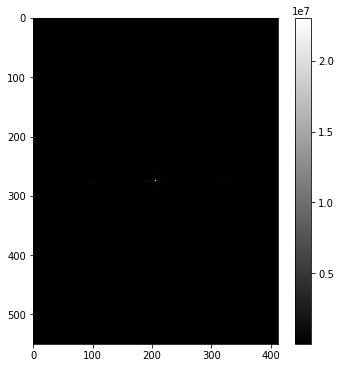

In [41]:
plt.figure(figsize=(6, 6))
plt.imshow(fourier_array, cmap = 'gray')
plt.colorbar()

## Inverse Transform
We can take the inverse of the Fourier Transformed image to obtain the original image.

In [42]:
inverse_fft = np.fft.ifft2(fftim.fft2(image), s=None, axes = (-2, -1))

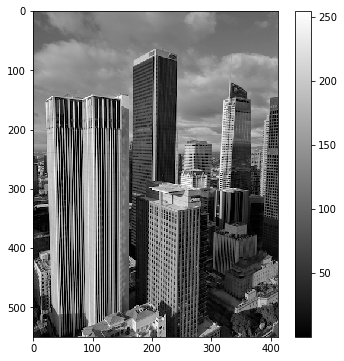

In [43]:
plt.figure(figsize = (6, 6))
plt.imshow(np.abs(inverse_fft), cmap = 'gray')
plt.colorbar()

## Convolution
The convolution is a mathamtical operation that expresses the integral overlap between two functions. A simple example is a blurred image which is essentially the convolution of an un-blurred image with a blurring function.

Here we will deal with the convolution in Fourier space. The operation is usually simplier in Fourier space than in the real/spatial space. In Fourier space, the convolution is performed on the whole iamge at once rather than sliding the filter window on the image in the spatial domain.

The convolution operation is expressed mathamtically as:
$$
\left[ f * g\right] = \int_{0}^{t}f(\tau)g(t-\tau) d\tau
$$
where $f$ and $g$ are the two functions and the $*$ represents convolution.

### Properties
   * $f*g = g * f$ Commutative Property
   * $f*g(g*h) = (f*g)*h$ Associative Property
   * $f * (g+h) = f*g + g*h$ Distributive Property

If we assume the convolution of $f$ and $g$ is the function $h$
$$
h(t) = \left[ f * g \right](t)
$$

If the Fourier transform of this function is H, then H is defined as
$$
H = F.G
$$
where F and G are the Fourier transforms of the functions $f$ and $g$ respectively and the $.$ represents multiplication. What this entails is, in Fourier space the complex operation of convolution is replaced by a more simple multiplication operation.

In [66]:
# Using a Gaussian kernel
# Import the image
image = np.array(Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L'))

In [67]:
# 1D Gaussian Kernel
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t*t)
bump /= np.trapz(bump) # Normalize the integral to 1

# Make a 2D kernel out of the itnegral
kernel = bump[:,np.newaxis] * bump[np.newaxis,:] # Results in a 30x30 matrix

In [68]:
# Pad the kernel to have the same shape as the image
# Use `scip.signal.fftpack.fft2` to perform the fft
kernel_fft = fftim.fft2(kernel, shape = image.shape, axes = (0, 1))

In [72]:
# Compute the Fourier of the original image
image_fft = fftim.fft2(image)

## Plot images in spatial and in Fourier Domain

<Figure size 432x288 with 0 Axes>

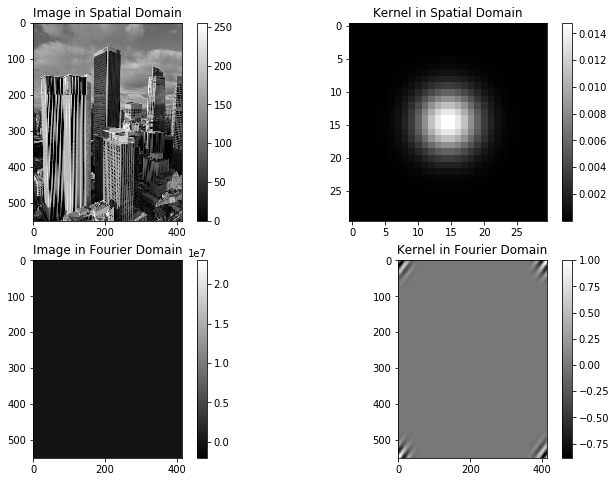

In [73]:
plt.figure()
fig, ax = plt.subplots(2, 2, figsize = (12,8))

im1_sp = ax[0, 0].imshow(image, cmap = 'gray')
ax[0, 0].title.set_text("Image in Spatial Domain")
fig.colorbar(im1_sp, ax = ax[0, 0])

im1_fft = ax[1, 0].imshow(image_fft.real, cmap = 'gray')
ax[1, 0].title.set_text("Image in Fourier Domain")
fig.colorbar(im1_fft, ax = ax[1, 0])

im2_sp = ax[0, 1].imshow(kernel, cmap = 'gray')
ax[0, 1].title.set_text("Kernel in Spatial Domain")
fig.colorbar(im2_sp, ax = ax[0, 1])


im2_fft = ax[1, 1].imshow(kernel_fft.real, cmap = 'gray')
ax[1, 1].title.set_text("Kernel in Fourier Domain")
fig.colorbar(im2_fft, ax = ax[1, 1])

plt.show()

## Perform the convolution and take inverse Fourier to recover original image

In [77]:
convolution_array = image_fft*kernel_ft

convolution_image = fftim.ifft2(convolution_array)

array([[86.35505508-2.22432663e-14j, 90.35941548-1.05616560e-14j,
        94.48021866-2.92709042e-14j, ..., 74.68811247-6.76295537e-15j,
        78.6110153 -2.62230651e-14j, 82.4762959 -3.57784602e-14j],
       [85.62278085-2.45906509e-14j, 89.6121087 -1.36119999e-14j,
        93.70772735-2.70237224e-14j, ..., 74.62468712-7.71230595e-15j,
        78.19119294-2.55575136e-14j, 81.833574  -3.94485278e-14j],
       [85.2051803 -2.39548053e-14j, 89.09645314-1.63278709e-14j,
        93.0116419 -3.50150562e-14j, ..., 74.72044835-1.76668797e-14j,
        78.02254715-2.42170485e-14j, 81.50645135-4.27001814e-14j],
       ...,
       [84.09854322-2.57286877e-14j, 88.77034958+1.58335727e-16j,
        93.48518414-2.24065996e-14j, ..., 69.67219644-7.26553280e-15j,
        74.52305359-2.56142850e-14j, 79.37486294-4.71190191e-14j],
       [86.23793907-1.28677034e-14j, 90.55508237-1.96568695e-14j,
        94.90872322-2.76718913e-14j, ..., 72.63905668-9.22250187e-15j,
        77.31657166-1.26875575e-14j

In [79]:
convolved_image = Image.fromarray(convolution_image.real.astype(np.uint8))
convolved_image.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C5ConvolvedImage.png')

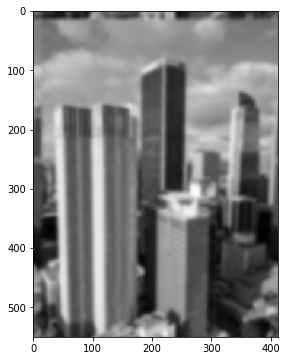

In [76]:
plt.figure(figsize=(6, 6))
plt.imshow(convolution_image.real, cmap='gray')

## Ideal Lowpass Filter
The convolution fucntion for the 2D ideal lowpass filter (ILPF) is given by

$$
H(u, v) = 
\begin{cases} 
      1 & \text{if } d(i, v)\leq d_0 \\
      0 & \text{else}
\end{cases}
$$

where $d_0$ is a specified quantity and $d(u, v)$ is the Euclidean distance from point $u, v$ to the origin of the Fourier transform. For an image of size $M by N$, the coordinates of the origin are $\left( \frac{M}{2}, \frac{N}{2} \right)$. So $d_0$ is the distance of the cutof frequency fro mthe origin.

After the convolution function is defined, the ideal lowpass filter can be performed with element by element multiplication of the FFT of the image and the convolution function. The inverse FFT is then performed to get back a viewable image.

In [128]:
# Using a Gaussian kernel
# Import the image
image = np.array(Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L'))

In [129]:
# Perform the FFT and shift the frequency range
image_fft = fftim.fft2(image)
image_fft_shifted = fftim.fftshift(image_fft)

In [130]:
# Initialize the convolution function
M, N = image_fft_shifted.shape[0], image_fft_shifted.shape[1]

# Define H as array of 1's
H = np.ones((M, N))
center1, center2 = M/2, N/2

# Define the cutoff radius
d0 =  50

In [131]:
# Define the convolution function for the Ideal Lowpass Filter
for i in range(1, M):
    for j in range(1, N):
        r1 = (i-center1)**2 + (j-center2)**2
        # Compute the euclidean distance from the origin
        r = np.sqrt(r1)

        # Using the cutoff frequency eliminate the high frequencies
        if r > d0:
            H[i, j] = 0.0

In [132]:
# Convert H to an image
H = Image.fromarray(H.astype(np.uint8))

In [133]:
# Perform the convolution
convolved_array = image_fft_shifted * H

In [134]:
# Compute the magnitude of the inverse FFT
convolved_array = np.abs(fftim.ifft2(convolved_array))

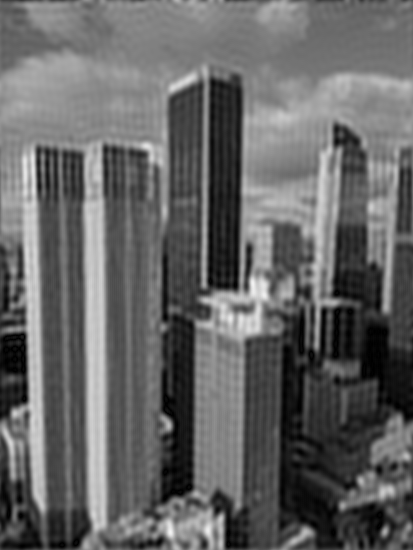

In [137]:
# Convert the convolution array to an image and save
convolved_image = Image.fromarray(convolved_array.astype(np.uint8))
convolved_image.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C5IdealLowpassFilter.png')
convolved_image